The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


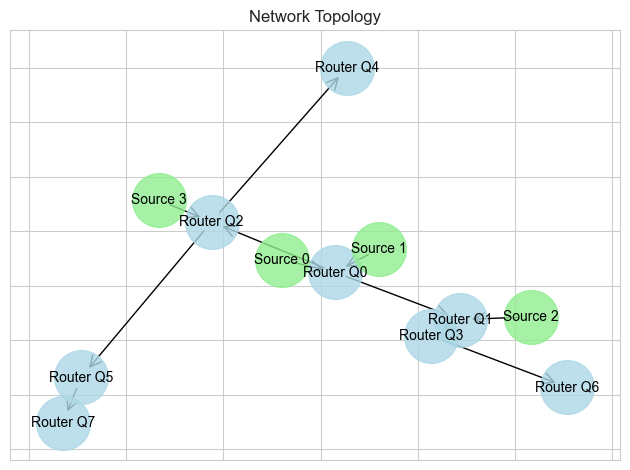

------------- Router Q0 -------------
Packets Transmitted: 486
Packets dropped ratio: 0.08503
Packets dropped: 46
Average Transmission time (ms): 0.00276
------------- Router Q1 -------------
Packets Transmitted: 647
Packets dropped ratio: 0.17193
Packets dropped: 136
Average Transmission time (ms): 0.00481
------------- Router Q2 -------------
Packets Transmitted: 503
Packets dropped ratio: 0.19811
Packets dropped: 126
Average Transmission time (ms): 0.00364
------------- Router Q3 -------------
Packets Transmitted: 545
Packets dropped ratio: 0.14683
Packets dropped: 95
Average Transmission time (ms): 0.00419
------------- Router Q4 -------------
Packets Transmitted: 491
Packets dropped ratio: 0.01789
Packets dropped: 9
Average Transmission time (ms): 0.00392
------------- Router Q5 -------------
Packets Transmitted: 496
Packets dropped ratio: 0.00795
Packets dropped: 4
Average Transmission time (ms): 0.00288
------------- Router Q6 -------------
Packets Transmitted: 503
Packets dropp

In [17]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import sys
import networkx as nx
import matplotlib.pyplot as plt

from simulation.NetworkSimulation import NetworkSimulation
sys.path.append('../') 

def plot_network_topology(simulation):
    """
    This function plots the network topology of queues and sources using networkx and seaborn.

    """

    G = nx.DiGraph()

    # Add nodes for each queue
    for i, q in enumerate(simulation.queues):
        G.add_node(q.name, type='queue')

    # Add edges for queues that have next_queues
    for i, q in enumerate(simulation.queues):
        # Check if q.next_queues exists and is a list
        # If next_queues is empty, no edges are created from this queue
        for nq in q.next_queues:
            if nq != q.NO_DESTINATION:
                target_queue_name = simulation.queues[nq].name
                G.add_edge(q.name, target_queue_name)

    # Add nodes and edges for sources
    for i, src in enumerate(simulation.sources):
        source_node = f"Source {i}"
        G.add_node(source_node, type='source')
        if src.destination != q.NO_DESTINATION:
            dest_queue_name = simulation.queues[src.destination].name
            G.add_edge(source_node, dest_queue_name)

    sns.set_style("whitegrid")
    pos = nx.spring_layout(G, seed=42)
    queue_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'queue']
    source_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'source']

    nx.draw_networkx_nodes(G, pos, nodelist=queue_nodes, node_color='lightblue', node_size=1500, alpha=0.8)
    nx.draw_networkx_nodes(G, pos, nodelist=source_nodes, node_color='lightgreen', node_size=1500, alpha=0.8)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title("Network Topology")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    simulation = NetworkSimulation(max_arrivals=1000)
    # The topology can be printed before or after the simulation run.
    plot_network_topology(simulation)
    simulation.run()